In [171]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [172]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


638

In [178]:
## PERFORM API CALLS

#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it's being processed (with the city number and city name).

cities_data_columns= ["City","Cloudiness","Country","Date","Humidity","Latitude","Longitude",
                      "Max Temp","Wind Speed (mph)"]
cities_data_df = pd.DataFrame(columns=cities_data_columns)

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "IMPERIAL"

row_count = 1
city_count = 0

print("Beginning Data Retrieval")
print("------------------------")

for city_count in range(0, len(cities)):
    target_city = cities[city_count]
    target_url = f"{url}appid={api_key}&units={units}&q="
    city_data = requests.get(target_url + target_city.replace(" ","+")).json()
    if city_data["cod"] == "404":
        print("City not found, skipping...")

    else:
        cities_data_df.set_value(city_count, "City", city_data["name"])
        cities_data_df.set_value(city_count, "Cloudiness", city_data["clouds"]["all"])
        cities_data_df.set_value(city_count, "Country", city_data["sys"]["country"])
        cities_data_df.set_value(city_count, "Date", city_data["dt"])
        cities_data_df.set_value(city_count, "Humidity", city_data["main"]["humidity"])
        cities_data_df.set_value(city_count, "Latitude", city_data["coord"]["lat"])
        cities_data_df.set_value(city_count, "Longitude", city_data["coord"]["lon"])
        cities_data_df.set_value(city_count, "Max Temp", city_data["main"]["temp"])
        cities_data_df.set_value(city_count, "Wind Speed (mph)", city_data["wind"]["speed"])
        
        print("Proceesing Record " , row_count, ' | ' , city_data["name"])
        row_count += 1

    city_count = city_count + 1
    
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Beginning Data Retrieval
------------------------


C:\Users\maluk\Anaconda3\envs\malucastellanos\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\maluk\Anaconda3\envs\malucastellanos\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\maluk\Anaconda3\envs\malucastellanos\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\maluk\Anaconda3\envs\malucastellanos\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\maluk\Anaconda3\envs\malucastellanos\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: set_value is deprecated and will be

Proceesing Record  1  |  Mahebourg
Proceesing Record  2  |  Dikson
Proceesing Record  3  |  Barabai
Proceesing Record  4  |  Klaksvik
Proceesing Record  5  |  Callaway
Proceesing Record  6  |  Menongue
Proceesing Record  7  |  Hermanus
Proceesing Record  8  |  Birin
Proceesing Record  9  |  Husavik
Proceesing Record  10  |  Puerto Ayora
Proceesing Record  11  |  Yumen
Proceesing Record  12  |  Thompson
Proceesing Record  13  |  Kysyl-Syr
Proceesing Record  14  |  Port Elizabeth
Proceesing Record  15  |  Bredasdorp
Proceesing Record  16  |  Marawi
Proceesing Record  17  |  Busselton
Proceesing Record  18  |  Kem
Proceesing Record  19  |  Nuuk
Proceesing Record  20  |  Kaitangata
Proceesing Record  21  |  Atuona
Proceesing Record  22  |  Albany
Proceesing Record  23  |  Vao
Proceesing Record  24  |  Yellowknife
City not found, skipping...
Proceesing Record  25  |  Ewa Beach
Proceesing Record  26  |  Iznik
Proceesing Record  27  |  Ribeira Grande
Proceesing Record  28  |  Shambu
Proceesin

Proceesing Record  214  |  Nidzica
Proceesing Record  215  |  Byron Bay
Proceesing Record  216  |  Leningradskiy
City not found, skipping...
Proceesing Record  217  |  Bandar-e Lengeh
Proceesing Record  218  |  Ilulissat
Proceesing Record  219  |  Los Llanos de Aridane
Proceesing Record  220  |  Broken Hill
Proceesing Record  221  |  Puerto Princesa
City not found, skipping...
Proceesing Record  222  |  Upernavik
Proceesing Record  223  |  Skjervoy
Proceesing Record  224  |  Pointe Michel
Proceesing Record  225  |  Henties Bay
Proceesing Record  226  |  Keti Bandar
Proceesing Record  227  |  Portland
Proceesing Record  228  |  Antalaha
Proceesing Record  229  |  Conde
Proceesing Record  230  |  Egvekinot
Proceesing Record  231  |  Jamestown
Proceesing Record  232  |  Yangjiang
Proceesing Record  233  |  Kirkenaer
Proceesing Record  234  |  Bandarbeyla
Proceesing Record  235  |  Saint-Philippe
Proceesing Record  236  |  Isangel
Proceesing Record  237  |  Ukiah
Proceesing Record  238  | 

Proceesing Record  422  |  Launceston
Proceesing Record  423  |  Udachnyy
City not found, skipping...
Proceesing Record  424  |  Erenhot
Proceesing Record  425  |  Axim
Proceesing Record  426  |  Panjab
Proceesing Record  427  |  Kodiak
Proceesing Record  428  |  Ambulu
Proceesing Record  429  |  Terenos
Proceesing Record  430  |  Athni
Proceesing Record  431  |  Katsuura
Proceesing Record  432  |  Tete
Proceesing Record  433  |  Coari
Proceesing Record  434  |  Zambezi
Proceesing Record  435  |  Srednekolymsk
Proceesing Record  436  |  Leshukonskoye
City not found, skipping...
City not found, skipping...
Proceesing Record  437  |  Clyde River
Proceesing Record  438  |  Kuryk
Proceesing Record  439  |  Kingston
Proceesing Record  440  |  Casablanca
Proceesing Record  441  |  Zabid
Proceesing Record  442  |  Surt
Proceesing Record  443  |  Sar-e Pul
Proceesing Record  444  |  Maceio
Proceesing Record  445  |  Igarka
Proceesing Record  446  |  Labuhan
Proceesing Record  447  |  Carlagan


In [179]:
cities_data_df.count()

City                580
Cloudiness          580
Country             580
Date                580
Humidity            580
Latitude            580
Longitude           580
Max Temp            580
Wind Speed (mph)    580
dtype: int64

In [180]:
## CONVERT RAW DATA TO DATAFRAME

cities_data_df = cities_data_df.reset_index()
del cities_data_df['index']

#Export the city data into a .csv.
cities_data_df.to_csv("WeatherPy/Cities_Data.csv")

#Display the DataFrame
cities_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed (mph)
0,Mahebourg,40,MU,1547146800,83,-20.41,57.7,82.4,11.41
1,Dikson,32,RU,1547148562,100,73.51,80.55,-17.69,7.76
2,Barabai,92,ID,1547148609,100,-2.59,115.38,71.7,2.13
3,Klaksvik,64,FO,1547146200,93,62.23,-6.59,46.4,19.46
4,Callaway,1,US,1547147760,55,46.98,-95.91,17.01,9.17


In [151]:
# PLOTTING THE DATA

#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.

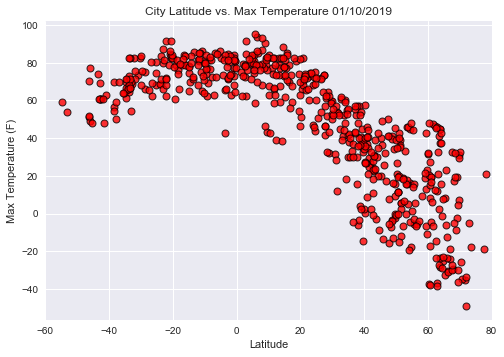

In [182]:
#Latitude vs. Temperature

plt.scatter(cities_data_df["Latitude"], cities_data_df["Max Temp"],
            edgecolor="black", color="red", linewidths=1, marker="o", alpha=0.8, label="City")
plt.title(f"City Latitude vs. Max Temperature {datetime.datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60, 80])

plt.savefig("WeatherPy/Latitude_Temperature.png")

plt.show()

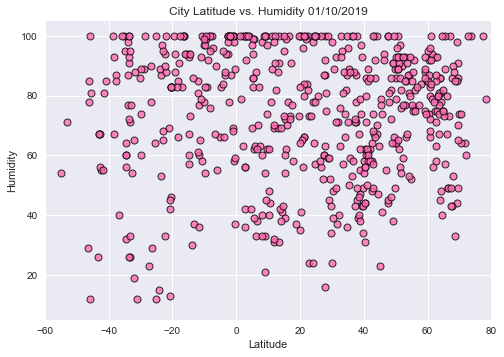

In [186]:
#Latitude vs. Humidity

plt.scatter(cities_data_df["Latitude"], cities_data_df["Humidity"],
            edgecolor="black", color="hotpink", linewidths=1, marker="o", alpha=0.8, label="City")

plt.title(f"City Latitude vs. Humidity {datetime.datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60, 80])
plt.ylim([5,105])

plt.savefig("WeatherPy/Latitude_Humidity.png")

plt.show()

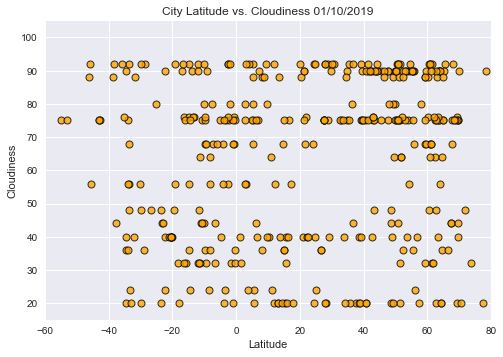

In [184]:
#Latitude vs. Cloudiness

plt.scatter(cities_data_df["Latitude"], cities_data_df["Cloudiness"],
            edgecolor="black", color="orange", linewidths=1, marker="o", alpha=0.8, label="City")

plt.title(f"City Latitude vs. Cloudiness {datetime.datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60, 80])
plt.ylim([15,105])

plt.savefig("WeatherPy/Latitude_Cloudiness.png")

plt.show()

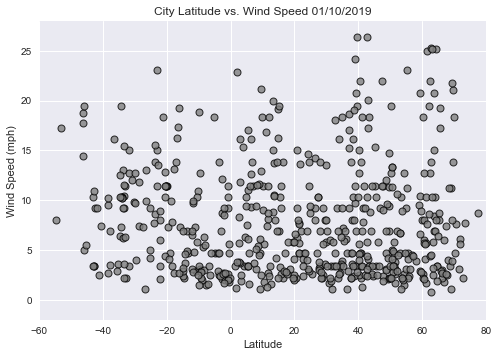

In [187]:
#Latitude vs. Cloudiness

plt.scatter(cities_data_df["Latitude"], cities_data_df["Wind Speed (mph)"],
            edgecolor="black", color="gray", linewidths=1, marker="o", alpha=0.8, label="City")

plt.title(f"City Latitude vs. Wind Speed {datetime.datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60, 80])
plt.ylim([-2,28])

plt.savefig("WeatherPy/Latitude_WindSpeed.png")

plt.show()